In [1]:
from pathlib import Path

import cv2
import numpy as np
import matplotlib.pyplot as plt

from numpy.typing import NDArray

In [95]:
from torchmetrics.image import StructuralSimilarityIndexMeasure as SSIM
ssim_ = SSIM(reduction='none')

In [98]:
import torch

@torch.no_grad()
def ssim(a: NDArray, b: NDArray) -> float:
    a = torch.tensor(a[None]).permute(0, 3, 1, 2)
    b = torch.tensor(b[None]).permute(0, 3, 1, 2)
    res = ssim_(a, b)
    return float(res)

@torch.no_grad()
def ssim_batch(a: NDArray, b: NDArray) -> float:
    a = torch.tensor(a).permute(0, 3, 1, 2)
    b = torch.tensor(b).permute(0, 3, 1, 2)
    res = ssim_(a, b)
    return res.numpy()

In [2]:
data = np.load('../data/mnist.npz')['training_images'].reshape(-1, 28, 28, 1).astype('float32')

In [15]:
data.shape

(50000, 28, 28, 1)

In [104]:
def read_image(p: Path) -> NDArray:
    return cv2.imread(str(p))[..., :1].astype('float32') / 255

In [105]:
directory = Path('../data/suspicious/binary-mnist')
images = [read_image(p) for p in directory.glob('*.png')]
len(images)

41

In [106]:
from tqdm.auto import tqdm

closest = []

for image in tqdm(images):
    image = image[None].repeat(len(data), axis=0)
    metrics = ssim_batch(image, data)
    closest.append(np.argmax(metrics))

  0%|          | 0/41 [00:00<?, ?it/s]

In [108]:
closest

[np.int64(25300),
 np.int64(48900),
 np.int64(26865),
 np.int64(1985),
 np.int64(15123),
 np.int64(21890),
 np.int64(14768),
 np.int64(6029),
 np.int64(45131),
 np.int64(4039),
 np.int64(28828),
 np.int64(2748),
 np.int64(16025),
 np.int64(9330),
 np.int64(41618),
 np.int64(29303),
 np.int64(2178),
 np.int64(34392),
 np.int64(25626),
 np.int64(558),
 np.int64(31127),
 np.int64(1363),
 np.int64(36147),
 np.int64(5155),
 np.int64(25847),
 np.int64(4729),
 np.int64(47552),
 np.int64(44151),
 np.int64(1150),
 np.int64(36275),
 np.int64(32540),
 np.int64(41027),
 np.int64(46530),
 np.int64(1937),
 np.int64(14768),
 np.int64(49409),
 np.int64(16192),
 np.int64(4042),
 np.int64(24222),
 np.int64(26183),
 np.int64(15949)]

In [102]:
closest

array([29967, 20534, 12964, 20534, 39806,  9641, 29592, 15746, 16100,
       18470, 13699, 27576])

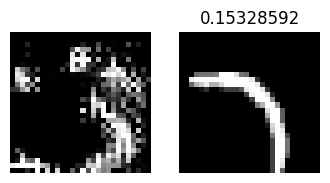

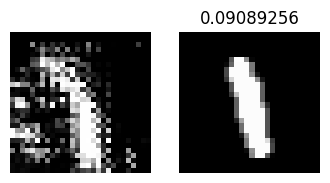

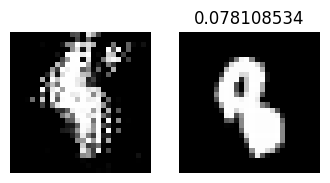

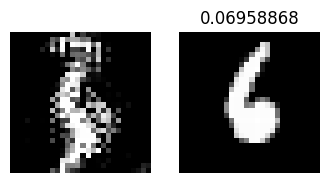

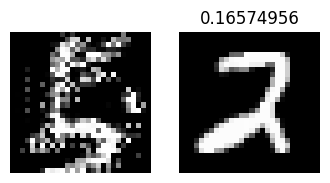

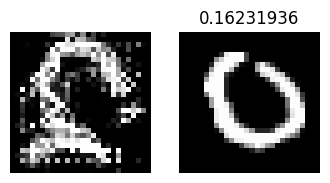

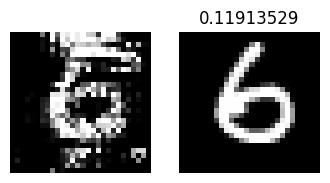

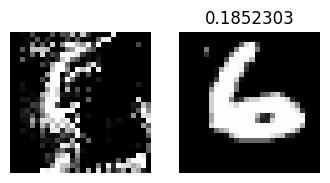

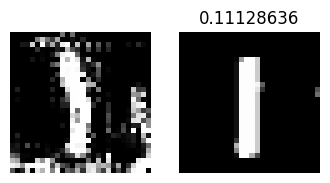

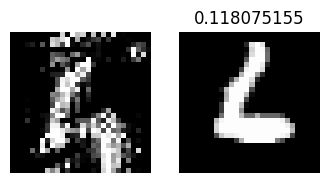

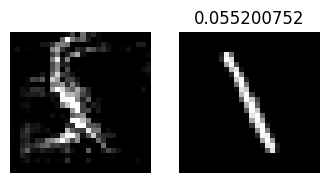

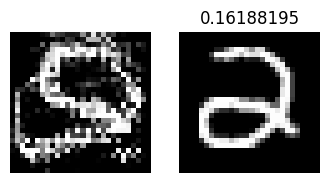

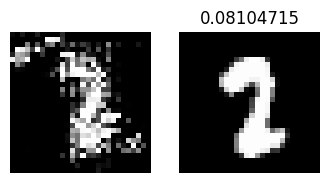

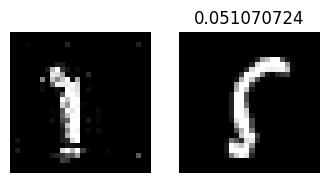

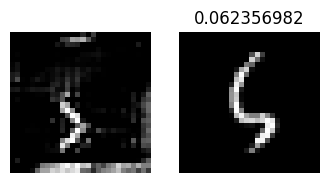

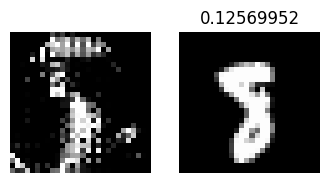

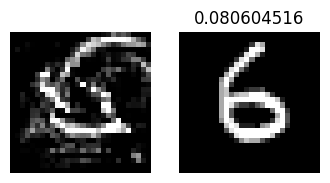

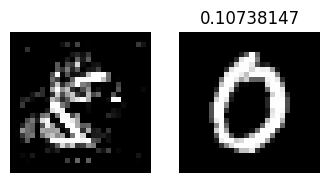

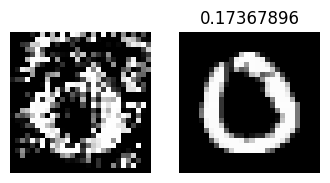

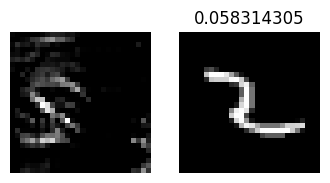

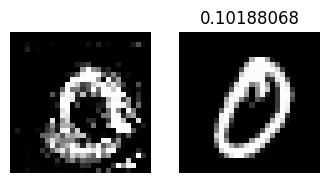

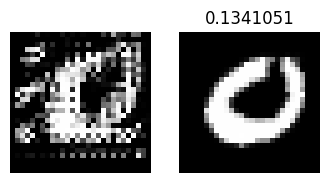

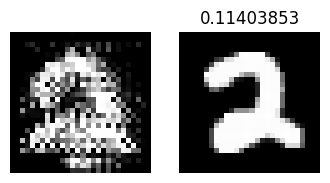

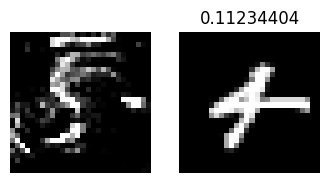

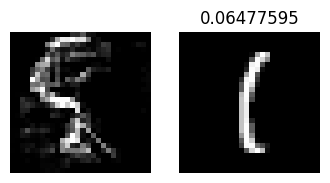

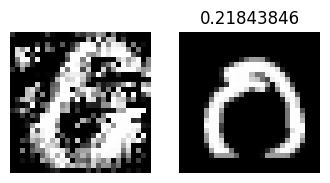

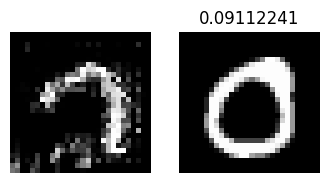

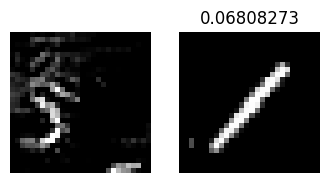

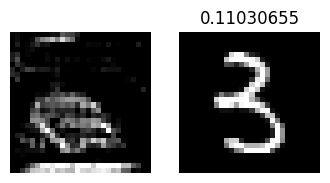

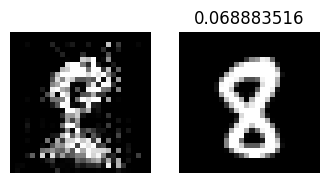

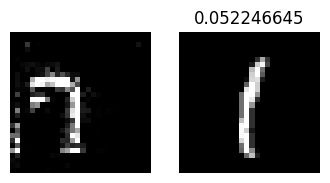

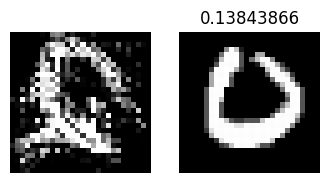

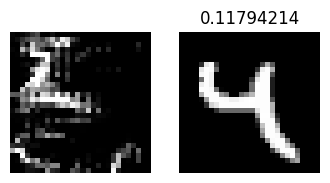

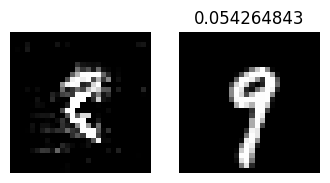

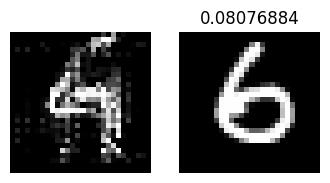

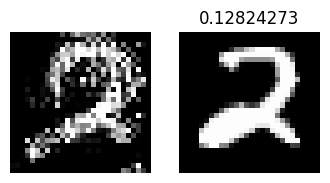

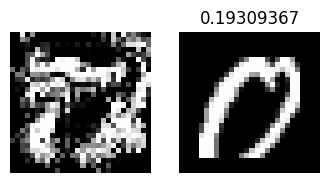

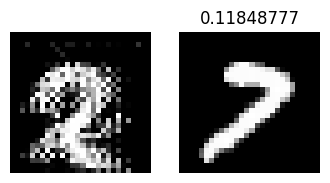

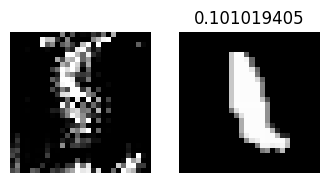

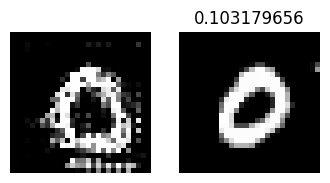

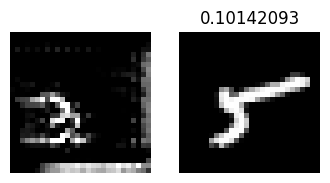

In [107]:
for i, (image, idx) in enumerate(zip(images, closest)):
    fig, ax = plt.subplots(ncols=2, figsize=(4, 2))
    plt.title(str(((image - data[idx]) ** 2).mean()))
    ax[0].imshow(image, cmap='gray')
    ax[1].imshow(data[idx], cmap='gray')
    ax[0].axis('off')
    ax[1].axis('off')
    plt.savefig(f'../results/match/{i}.png')
    plt.show()

